# Data Scientist의 전직 여부 예측 - 시각화와 전처리 (1)

 저의 첫 번째 데이터 분석 포스팅의 주제는 **“데이터 과학자의 전직 여부 예측”** 입니다. 제가 관심있는 **데이터 과학자(Data Scientist)**와 관련이 있고, **인적 자원 관리(Human Resource Management, HRM)** 분야의 데이터라는 것에 흥미를 갖고 이번 프로젝트를 진행하였습니다. 이번 프로젝트는 **시각화**를 포함한 간단한 **EDA(Exploratory Data Analysis, 탐색적 자료 분석)** 와 **데이터 전처리**를 다루고, 이후 데이터 과학자의 **전직 여부를 예측**하는 순서로 진행하고자 합니다. 

 우선 이번 프로젝트에서 사용한 데이터는 캐글에 있는 ['HR Analytics: Job Change of Data Scientists'][kagglelink] 데이터를 사용하였습니다. 데이터에 대해 간단하게 설명하면 아래와 같습니다.
 
 [kagglelink]: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

    빅데이터/데이터 사이언스 관련 회사에서, 회사가 진행하는 교육 과정을 성공적으로 통과한 사람 중에 고용을 진행하고자 합니다. 많은 사람이 훈련에 등록하지만, 그 중 어떤 참가자가 교육 후 회사에서 근무하기를 원하는 지 알고 싶습니다. 이를 예측한다면, 회사는 채용과 관련된 시간과 비용을 절감할 수 있으며, 교육 과정도 개선할 수 있을 것입니다.

이번 게시글에서는 전직 여부 예측을 위한 전처리와 간단한 EDA를 진행하고자 합니다.

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


 주어진 데이터는 총 14개의 컬럼으로 구성되어있습니다. feature에 대한 간단한 설명은 아래 표와 같습니다.

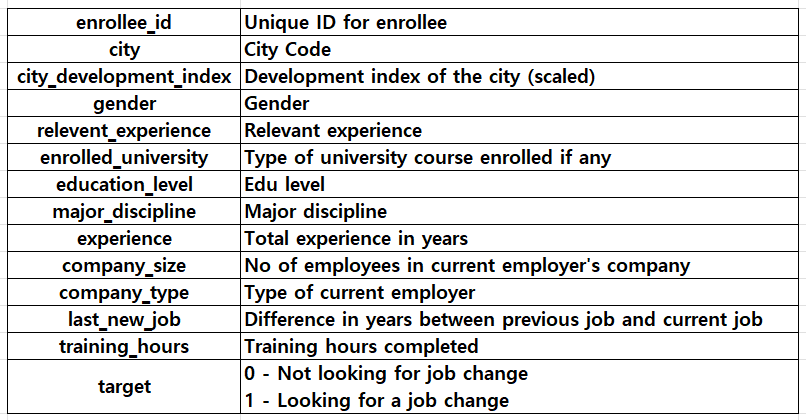

# 1. 컬럼별 EDA와 전처리

이번 프로젝트에서는 컬럼 순서대로 EDA와 전처리를 진행하였습니다.

우선 categorical 변수의 유일값과 결측치의 개수를 확인하고, value_counts를 출력하는 **check_cat()** 함수와 continuous 변수의 결측치 개수와 describe를 출력하는 **check_cont()** 함수를 정의하였습니다.

In [3]:
def check_cat(x):
    """
    x : pd.Series 형식의 input
    categorical 변수의 유일값과 결측치의 개수를 확인하고 value_counts 출력
    """
    print('유일값 개수 :', x.nunique())
    print('결측치 개수 :', x.isna().sum(), end='\n\n')
    print('### value counts ###')
    print(x.value_counts())
    
    
def check_cont(x):
    """
    x : pd.Series 형식의 input
    연속형 변수의 결측치 개수를 확인하고 describe 출력
    """
    print('결측치 개수 :', x.isna().sum(), end='\n\n')
    print('### describe ###')
    print(x.describe())

## 1.1. enrollee_id
- 데이터 index로 분석에 필요없는 데이터입니다. 따라서 컬럼을 삭제하였습니다.

In [4]:
df = df.drop('enrollee_id', axis=1)

## 1.2. city & city_development_index
- 'city'와 'city_development_index'는 서로 연관이 있어 함께 검토하였습니다. city는 도시(city code)를 나타내고, City Development Index(CDI)는 Infrastructure, Waste, Health, Education, Product의 5개 기준으로 도시의 발전 정도를 수치화한 것입니다. 

In [5]:
check_cat(df['city'])

유일값 개수 : 123
결측치 개수 : 0

### value counts ###
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


- 'city'는 123개의 유일값을 가지고 있으며, 결측치는 없습니다.

In [6]:
check_cont(df['city_development_index'])

결측치 개수 : 0

### describe ###
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


'city_development_index'도 결측치는 없으며, 컬럼 설명에서처럼 0~1 사이의 값으로 scaling이 되어있는 모습입니다.

이때 동일한 city code는 하나의 CDI를 가져야할 것입니다. 이를 다음과 같이 확인해보았습니다.

In [7]:
df.groupby('city').nunique().sort_values('city_development_index', ascending=False)['city_development_index']

city
city_1      1
city_62     1
city_59     1
city_57     1
city_55     1
           ..
city_142    1
city_141    1
city_140    1
city_14     1
city_99     1
Name: city_development_index, Length: 123, dtype: int64

위의 코드를 하나씩 설명하면 (1) groupby를 이용하여 city별로 묶고, (2) nunique로 컬럼별로 유일값의 개수를 계산합니다. (3) sort_values로 city_development_index의 nunique값을 내림차순으로 정렬하고 (4) 이 결과에서 'city_development_index' 컬럼만 출력합니다.

내림차순으로 정렬했기 때문에 하나의 한 도시가 여러 값을 가지면 상단에 표시될 것입니다. (더 쉬운 방법은 없는지 고민이 필요하다..)

**하나의 City Code는 하나의 CDI 값을 가지기에, 분류(Classification)를 진행할 때에는 둘 중 하나의 변수만 사용하면 될 것 같습니다.**

city는 문자형(string) 변수이며 유일값(unique value)의 개수가 123개이기때문에, 인코딩을 하기 어렵다는 문제가 있습니다. 그리고 city_development_index는 ‘**도시 발전의 정도’라는 정보를 더 포함**하고 있기때문에, **CDI를 사용하는 것이 더 유용할 것이라고 일차적으로 판단**하였습니다. 이러한 판단에 근거를 부여하고자 시각화를 실시하였습니다.

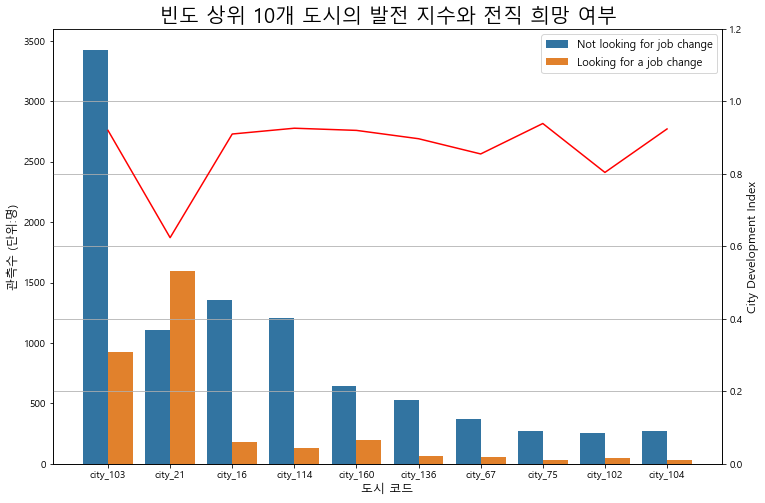

In [8]:
# 빈도수 상위 10개 도시만 df에서 추출
top10_city = df['city'].value_counts().index[:10]
temp = df[df['city'].isin(top10_city)]

# 빈도수 상위 10개 도시의 CDI 추출
top_dict = dict(temp.groupby('city').mean()['city_development_index'])
top_cdi = [top_dict.get(i) for i in top10_city]

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1 = sns.countplot(x='city', hue='target', data=temp, order=top10_city)
ax1.legend(labels=['Not looking for job change', 'Looking for a job change'], fontsize=11)
ax1.set_ylabel('관측수 (단위:명)', fontsize=12)
ax1.set_xlabel('도시 코드', fontsize=12)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=top10_city, y=top_cdi, color='r')
ax2.set_yticks(np.arange(0, 1.3, .2))
ax2.set_ylabel('City Development Index', fontsize=12)

plt.title('빈도 상위 10개 도시의 발전 지수와 전직 희망 여부', fontsize=20)
plt.grid()
plt.show()

위의 그래프는 관측 빈도 상위 10개 도시의 발전 지수(CDI)와 전직 희망 여부에 대한 것입니다. 빨간 실선은 도시의 CDI를 나타내며, 아래의 막대 그래프는 전직 희망 여부에 대한 분포를 나타냅니다. 10개 도시 중 **가장 발전지수가 낮은 city_21만이 유일하게 전직을 희망하는 인원이 전직을 희망하지 않는 인원보다 많은 것을 확인**할 수 있습니다.

**그렇다면 도시의 발전 지수와 전직 희망 비율은 관계가 있을까요?**

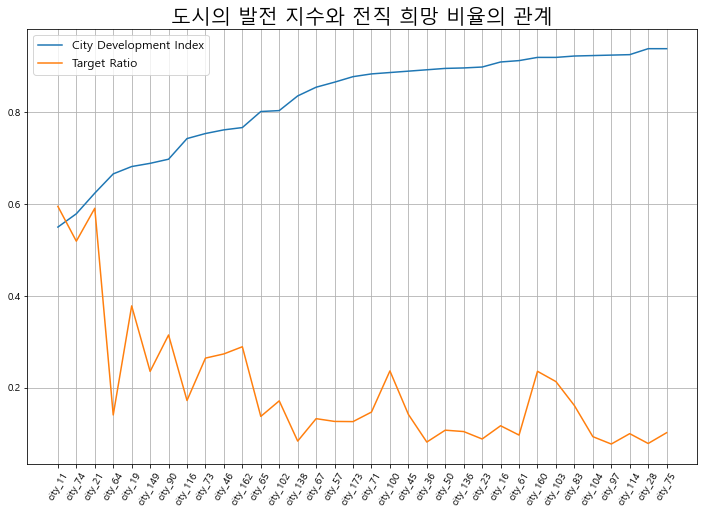

In [9]:
# 관측치가 100개 이상인 도시만 추출하여 Groupby 함수 적용
temp = df.groupby('city').count()
cities = temp[temp['target']>=100].index
cities = df[df['city'].isin(cities)]
cities = cities.groupby('city').mean().sort_values('city_development_index')

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(cities['city_development_index'], label='City Development Index')
plt.plot(cities['target'], label = 'Target Ratio')
plt.legend(fontsize=12)
plt.xticks(rotation=60)
plt.title('도시의 발전 지수와 전직 희망 비율의 관계', fontsize=20)
plt.grid()
plt.show()

관측수가 적은 데이터는 분석에 방해가 될 수 있으므로, 관측치가 100개 이상인 데이터만 추출하여 도시의 발전 지수와 전직 희망 여부의 관계를 시각화하였습니다.

여기서 **전직 희망 비율(Target Ratio)**의 의미는 다음과 같습니다.

    target에서 전직을 고려하지 않는 경우는 0의 값을 가지고, 전직을 고려하는 경우는 1의 값을 가집니다.

    city별로 groupby한 결과에서 target의 평균을 구하면, 전직을 고려하고 있는 사람의 비율이 계산됩니다.

    즉, Target Ratio가 1에 가까울수록 전직을 고려하고 있는 사람이 많음을 의미합니다.


위의 그래프에서 파란 실선은 CDI를 나타내며, 주황색 실선은 전직 희망 비율을 의미합니다. 그래프에 따르면 도시별로 격차는 존재하지만, **CDI가 높을수록 전직 희망 비율은 감소하는 경향**이 있습니다.

In [10]:
import scipy.stats as stats

rho, p_val =stats.pearsonr(cities['city_development_index'], cities['target'])
print(f'상관계수 : {rho:.2f}, p-val : {p_val}')

상관계수 : -0.83, p-val : 1.143925777958732e-09


통계적으로 확인하기 위하여 pearson 상관 분석을 실시한 결과, **도시별 발전 지수와 전직 희망 비율은 상관계수는 -0.83으로 0.01 수준에서 유의한 강한 음의 상관관계**를 보였습니다. 따라서 **도시의 발전지수가 낮을수록 이직을 고려하는 비율이 높다**고 할 수 있습니다. 

시각화와 상관분석 결과를 바탕으로 city보다 city_development_index가 예측에 유용할 것이라고 판단하여 city 컬럼은 삭제하였습니다.

In [11]:
df = df.drop('city', axis=1)

## 1.3. gender

In [12]:
check_cat(df['gender'])

유일값 개수 : 3
결측치 개수 : 4508

### value counts ###
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


gender에 대해서는 결측치처리가 필요합니다. 또한 문자형 변수이기에 인코딩도 해야합니다.

value_counts 결과에 따르면 남성 참가자가 그 외 성별의 참가자보다 10배 이상 많다는 것을 알 수 있습니다.

인코딩을 진행하기에 앞서 성별에 따른 전직 희망 분포를 시각화해보았습니다.

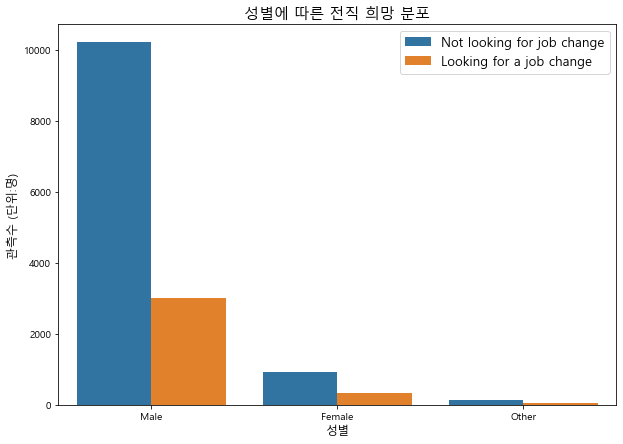

,target
gender,
Female,0.263328
Male,0.227819
Other,0.261780


In [13]:
plt.figure(figsize=(10, 7))
sns.countplot(x='gender', hue='target', data=df)
plt.legend(labels=['Not looking for job change', 'Looking for a job change'], fontsize=13)
plt.title('성별에 따른 전직 희망 분포', fontsize=15)
plt.xlabel('성별', fontsize=12)
plt.ylabel('관측수 (단위:명)', fontsize=12)
plt.show()

pd.DataFrame(df.groupby('gender').mean()['target'])

성별에 따른 전직 희망 비율을 계산한 결과 유의한 차이는 없는 것으로 보였으나, 남성의 전직 희망 비율이 다른 집단보다 낮았습니다.

gender 컬럼은 결측치와 인코딩을 실시해야하는데, 결측치는 남성과 여성 중 어느 하나로 혹은 랜덤하게 대체할 근거가 없습니다. 다른 범주에 비해 관측치가 월등히 많은 Male로 결측치를 대체할 수 있으나, Other의 경우에도 결측치와 같은 성격을 가진다고 보고 **gender_M과 gender_F로 더미화**하였습니다. 따라서 결측치와 Other는 gender_M==0, gender_F==0으로 처리하였습니다.

In [14]:
df['gender_M'] = df['gender'].apply(lambda x : 1 if x=='Male' else 0)
df['gender_F'] = df['gender'].apply(lambda x : 1 if x=='Female' else 0)
df = df.drop('gender', axis=1)

## 1.4. relevent_experience

In [15]:
check_cat(df['relevent_experience'])

유일값 개수 : 2
결측치 개수 : 0

### value counts ###
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


'relevent_experience'는 결측치가 없으며, 문자형 변수이므로 인코딩이 필요합니다.

value counts 결과를 통해 유경험자가 2배 이상 많은 것을 간단하게 확인할 수 있습니다.

이번에도 경험의 유무에 따른 전직 희망 분포를 시각화해보았습니다.

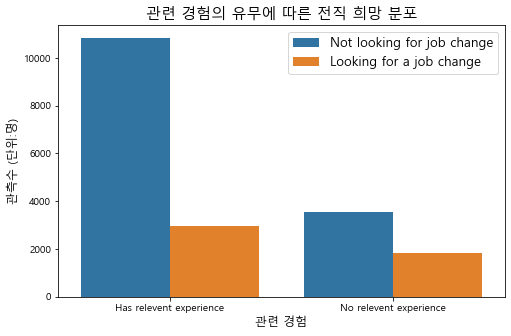

,target
relevent_experience,
Has relevent experience,0.214690
No relevent experience,0.338427


In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.legend(labels=['Not looking for job change', 'Looking for a job change'], fontsize=13)
plt.title('관련 경험의 유무에 따른 전직 희망 분포', fontsize=15)
plt.xlabel('관련 경험', fontsize=12)
plt.ylabel('관측수 (단위:명)', fontsize=12)
plt.show()

pd.DataFrame(df.groupby('relevent_experience').mean()['target'])

유경험자의 전직 희망 비율이 더 낮은 것을 알 수 있습니다.

이에 대하여 자의적인 해석을 덧붙인다면, 관련된 경험이 없는 사람은 빅데이터 혹은 데이터 사이언스와 관련된 회사에서 근무하지 않을 확률이 높으며, 또한 아직 한 번도 회사에 다녀본 적 없고 경험도 없는 사람일수도 있습니다. 이러한 사람들은 **새로운 분야로의 전직 혹은 취직을 희망하고 교육 과정에 등록하였기 때문에, 전직 희망 비율도 높다고 해석해볼 수 있습니다.**

여기서, 관련 경험이 있는 집단의 훈련 평균 시간(training_hours)과 관련 경험이 없는 집단의 훈련 평균 시간이 다르지 않을까라는 생각이 들었습니다. 따라서 **'유경험자 집단과 무경험자 집단의 훈련 평균 시간은 다르다.'라는 가설을 설정하고 t-test를 통해 가설을 검정해보았습니다.**

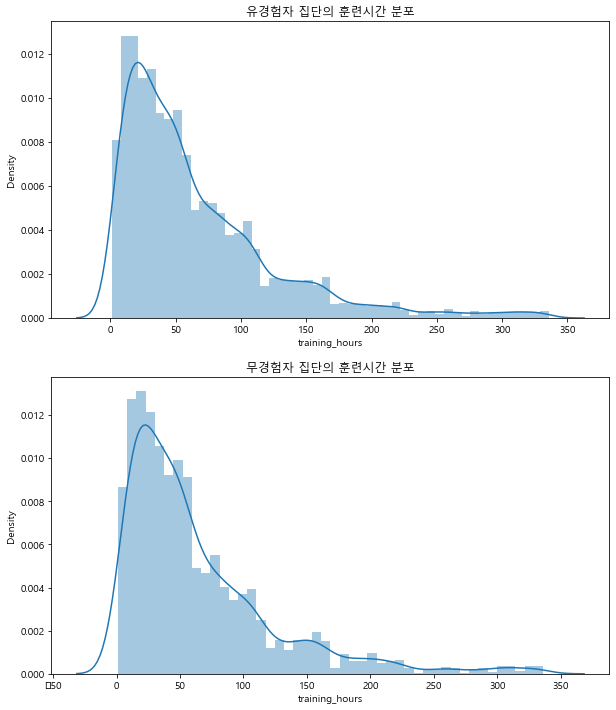

In [17]:
has_df = df[df['relevent_experience']=='Has relevent experience']
no_df = df[df['relevent_experience']=='No relevent experience']

plt.subplots(figsize=(10,12))
plt.subplot(211)
sns.distplot(has_df['training_hours'])
plt.title('유경험자 집단의 훈련시간 분포')

plt.subplot(212)
sns.distplot(no_df['training_hours'])
plt.title('무경험자 집단의 훈련시간 분포')

plt.show()

우선, 그래프를 통해 확인했을 때에는, 그래프의 모양이 거의 일치하여 차이가 없는 것처럼 보입니다.

- 다음으로 t-test를 실시하였습니다. 가설은 다음과 같습니다.
    - 귀무가설 : 경험의 유무에 따라 집단별 평균 학습 시간의 유의한 차이가 없을 것이다.
    - 대립가설 : 경험의 유무에 따라 집단별 평균 학습 시간의 유의한 차이가 있을 것이다.

In [18]:
stat, p_val = stats.ttest_ind(has_df['training_hours'], no_df['training_hours'])
print(f'p-value : {p_val:.6f}')

p-value : 0.109408


t-test 결과 p-value>0.05로 대립가설을 수용할 수 없습니다.

즉 **경험의 유무에 따라 집단별 평균 학습 시간에는 유의한 차이가 없습니다.** 이는 크게 두 가지로 해석할 수 있을 것 같습니다.

    1. 경험이 없는 사람에게도 어렵지 않은 교육을 제공하여, 경험이 있는 사람과 비슷한 시간에 교육을 완수할 수 있다.
    2. 지금의 교육 프로그램은 경험의 여부와 상관없이 교육에 동일한 시간을 투자하게 하여 유경험자에게 불필요한 시간 희생을 강요하고 있다.

1번의 경우에는 회사가 진행하는 교육에 대해 마케팅을 진행할 때, **경험이 없는 사람들도 쉽게 배울 수있도록 교육체계가 짜여있다는 것을 강조**할 수 있습니다. relevent_experience의 그래프를 보면 경험이 없는 사람들의 수가 유경험자의 수에 1/4 수준임을 확인할 수 있었습니다. 따라서 경험이 없는 사람들에게 이러한 점을 강조한다면, 그들이 교육에 참가할 수 있도록 유도할 수 있을 것입니다.

2번의 경우에는 **유경험자와 무경험자의 교육 과정을 구분하여 유경험자가 투자하는 시간을 감소시키는 방향으로 교육체계를 수정**할 수 있습니다.

하지만 이러한 해석은 교육에 대한 자세한 정보가 없기때문에 모두 해석 가능한 하나의 가설일 뿐입니다. 따라서 회사에서는 무경험자와 유경험자에 대한 설문조사나 인터뷰의 방식으로 교육 프로그램의 질을 수정할 수 있습니다.


마지막 레이블 인코딩을 진행하였습니다. 경험이 있는 경우는 1, 경험이 없는 경우는 0으로 인코딩을 실시하였습니다.

In [19]:
df['relevent_experience'] = df['relevent_experience'].apply(lambda x : 1 if x=='Has relevent experience' else 0)

- - -

이번 게시글에서는 14개의 컬럼 중에서 5개의 컬럼에 대한 EDA와 전처리를 진행하였습니다. 나머지 컬럼에 대해서는 다음 게시글에서 다루도록 하겠습니다.

그리고 다음 게시글에서 전처리를 이어서 진행하기 위해 이 때까지 전처리한 내용을 csv로 저장합니다.

In [20]:
df.to_csv('df_processed_1.csv', index=False)

긴 글 읽어주셔서 감사합니다.